# Assignment 1
#### Student Name: Mai Gia Phu
#### Student ID: 3927049

Date: 17/03/2024

Version: 1.0

Environment: Python 3 and VSCode

Libraries used:
* pandas
* re
* numpy
* nltk
* os
* sklearn
* genism
* itertools

## Importing Libraries



In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

## Read Data


In [91]:
df_train = pd.read_csv('data/data_train.csv')
df_train = df_train.set_index('Id')
df_train


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
Id,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,24,1,0,0,1,0,1,0,1,0,2,0,0,0,0,8,4,5,60,0,0
1,0,0,1,28,0,0,0,1,1,1,0,1,0,1,1,0,0,0,2,6,8,0,-64,0
2,0,0,1,36,1,0,0,1,1,0,0,1,1,3,30,30,1,0,3,2,1,-46,0,0
3,0,1,1,35,0,0,0,1,1,1,0,1,0,3,0,0,0,0,8,6,8,-83,-188,0
4,0,1,1,27,0,0,0,1,0,1,0,1,0,3,0,0,0,0,9,5,4,-58,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202939,0,0,1,29,0,0,0,1,0,1,0,1,1,3,10,2,0,0,8,6,7,-66,4,0
202940,0,0,1,23,0,0,0,1,0,0,0,1,0,1,0,0,0,0,11,5,7,0,-84,0
202941,1,1,1,38,0,0,0,1,1,1,0,1,0,3,0,2,0,1,10,6,6,-57,-16,0


In [92]:
df_test = pd.read_csv('data/data_test.csv')
df_test = df_test.set_index('Id')
df_test

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
Id,,,,,,,,,,,,,,,,,,,,,,,,
202944,1,1,1,30,1,0,1,1,1,1,0,1,0,2,3,0,0,1,11,4,7,0,-145,NaN
202945,0,0,1,27,1,0,0,0,0,1,0,1,0,1,0,30,1,1,13,2,5,28,-145,NaN
202946,0,0,1,21,0,0,0,1,1,1,0,1,0,3,0,5,0,0,10,6,8,-26,72,NaN
202947,0,0,1,24,1,0,0,1,1,1,0,1,0,4,0,30,0,0,9,6,7,0,0,NaN
202948,1,0,1,34,0,0,0,1,1,0,0,1,0,4,0,1,1,0,11,4,7,-73,-63,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,0,1,38,0,0,0,1,1,0,0,1,0,2,2,2,0,0,8,6,7,43,22,NaN
253676,0,1,1,24,0,0,0,1,0,1,1,1,0,3,25,0,0,0,10,6,7,-6,-67,NaN
253677,1,1,1,31,0,0,1,1,1,1,0,1,0,4,0,0,1,0,13,5,3,34,100,NaN


## Data Preprocessing

In [93]:
pd.options.display.max_columns = None
# Check basic information
df_train.info()

# Generate descriptive statistics
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 202944 entries, 0 to 202943
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                202944 non-null  int64
 1   HighChol              202944 non-null  int64
 2   CholCheck             202944 non-null  int64
 3   BMI                   202944 non-null  int64
 4   Smoker                202944 non-null  int64
 5   Stroke                202944 non-null  int64
 6   HeartDiseaseorAttack  202944 non-null  int64
 7   PhysActivity          202944 non-null  int64
 8   Fruits                202944 non-null  int64
 9   Veggies               202944 non-null  int64
 10  HvyAlcoholConsump     202944 non-null  int64
 11  AnyHealthcare         202944 non-null  int64
 12  NoDocbcCost           202944 non-null  int64
 13  GenHlth               202944 non-null  int64
 14  MentHlth              202944 non-null  int64
 15  PhysHlth              202944 non-null  

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000
mean,0.428700,0.424344,0.962655,28.379824,0.442634,0.040844,0.094391,0.756302,0.635372,0.811519,0.055912,0.951543,0.083693,2.514024,3.196971,4.256455,0.168707,0.439545,8.037449,5.050245,6.055641,-7.408660,-7.560041,0.175571
std,0.494891,0.494244,0.189607,6.612738,0.496700,0.197929,0.292372,0.429313,0.481327,0.391096,0.229752,0.214730,0.276928,1.070370,7.427247,8.736665,0.374494,0.496333,3.051568,0.985601,2.070140,75.993743,75.927137,0.380455
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-199.000000,-199.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,-55.000000,-55.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,40.000000,40.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,199.000000,199.000000,1.000000


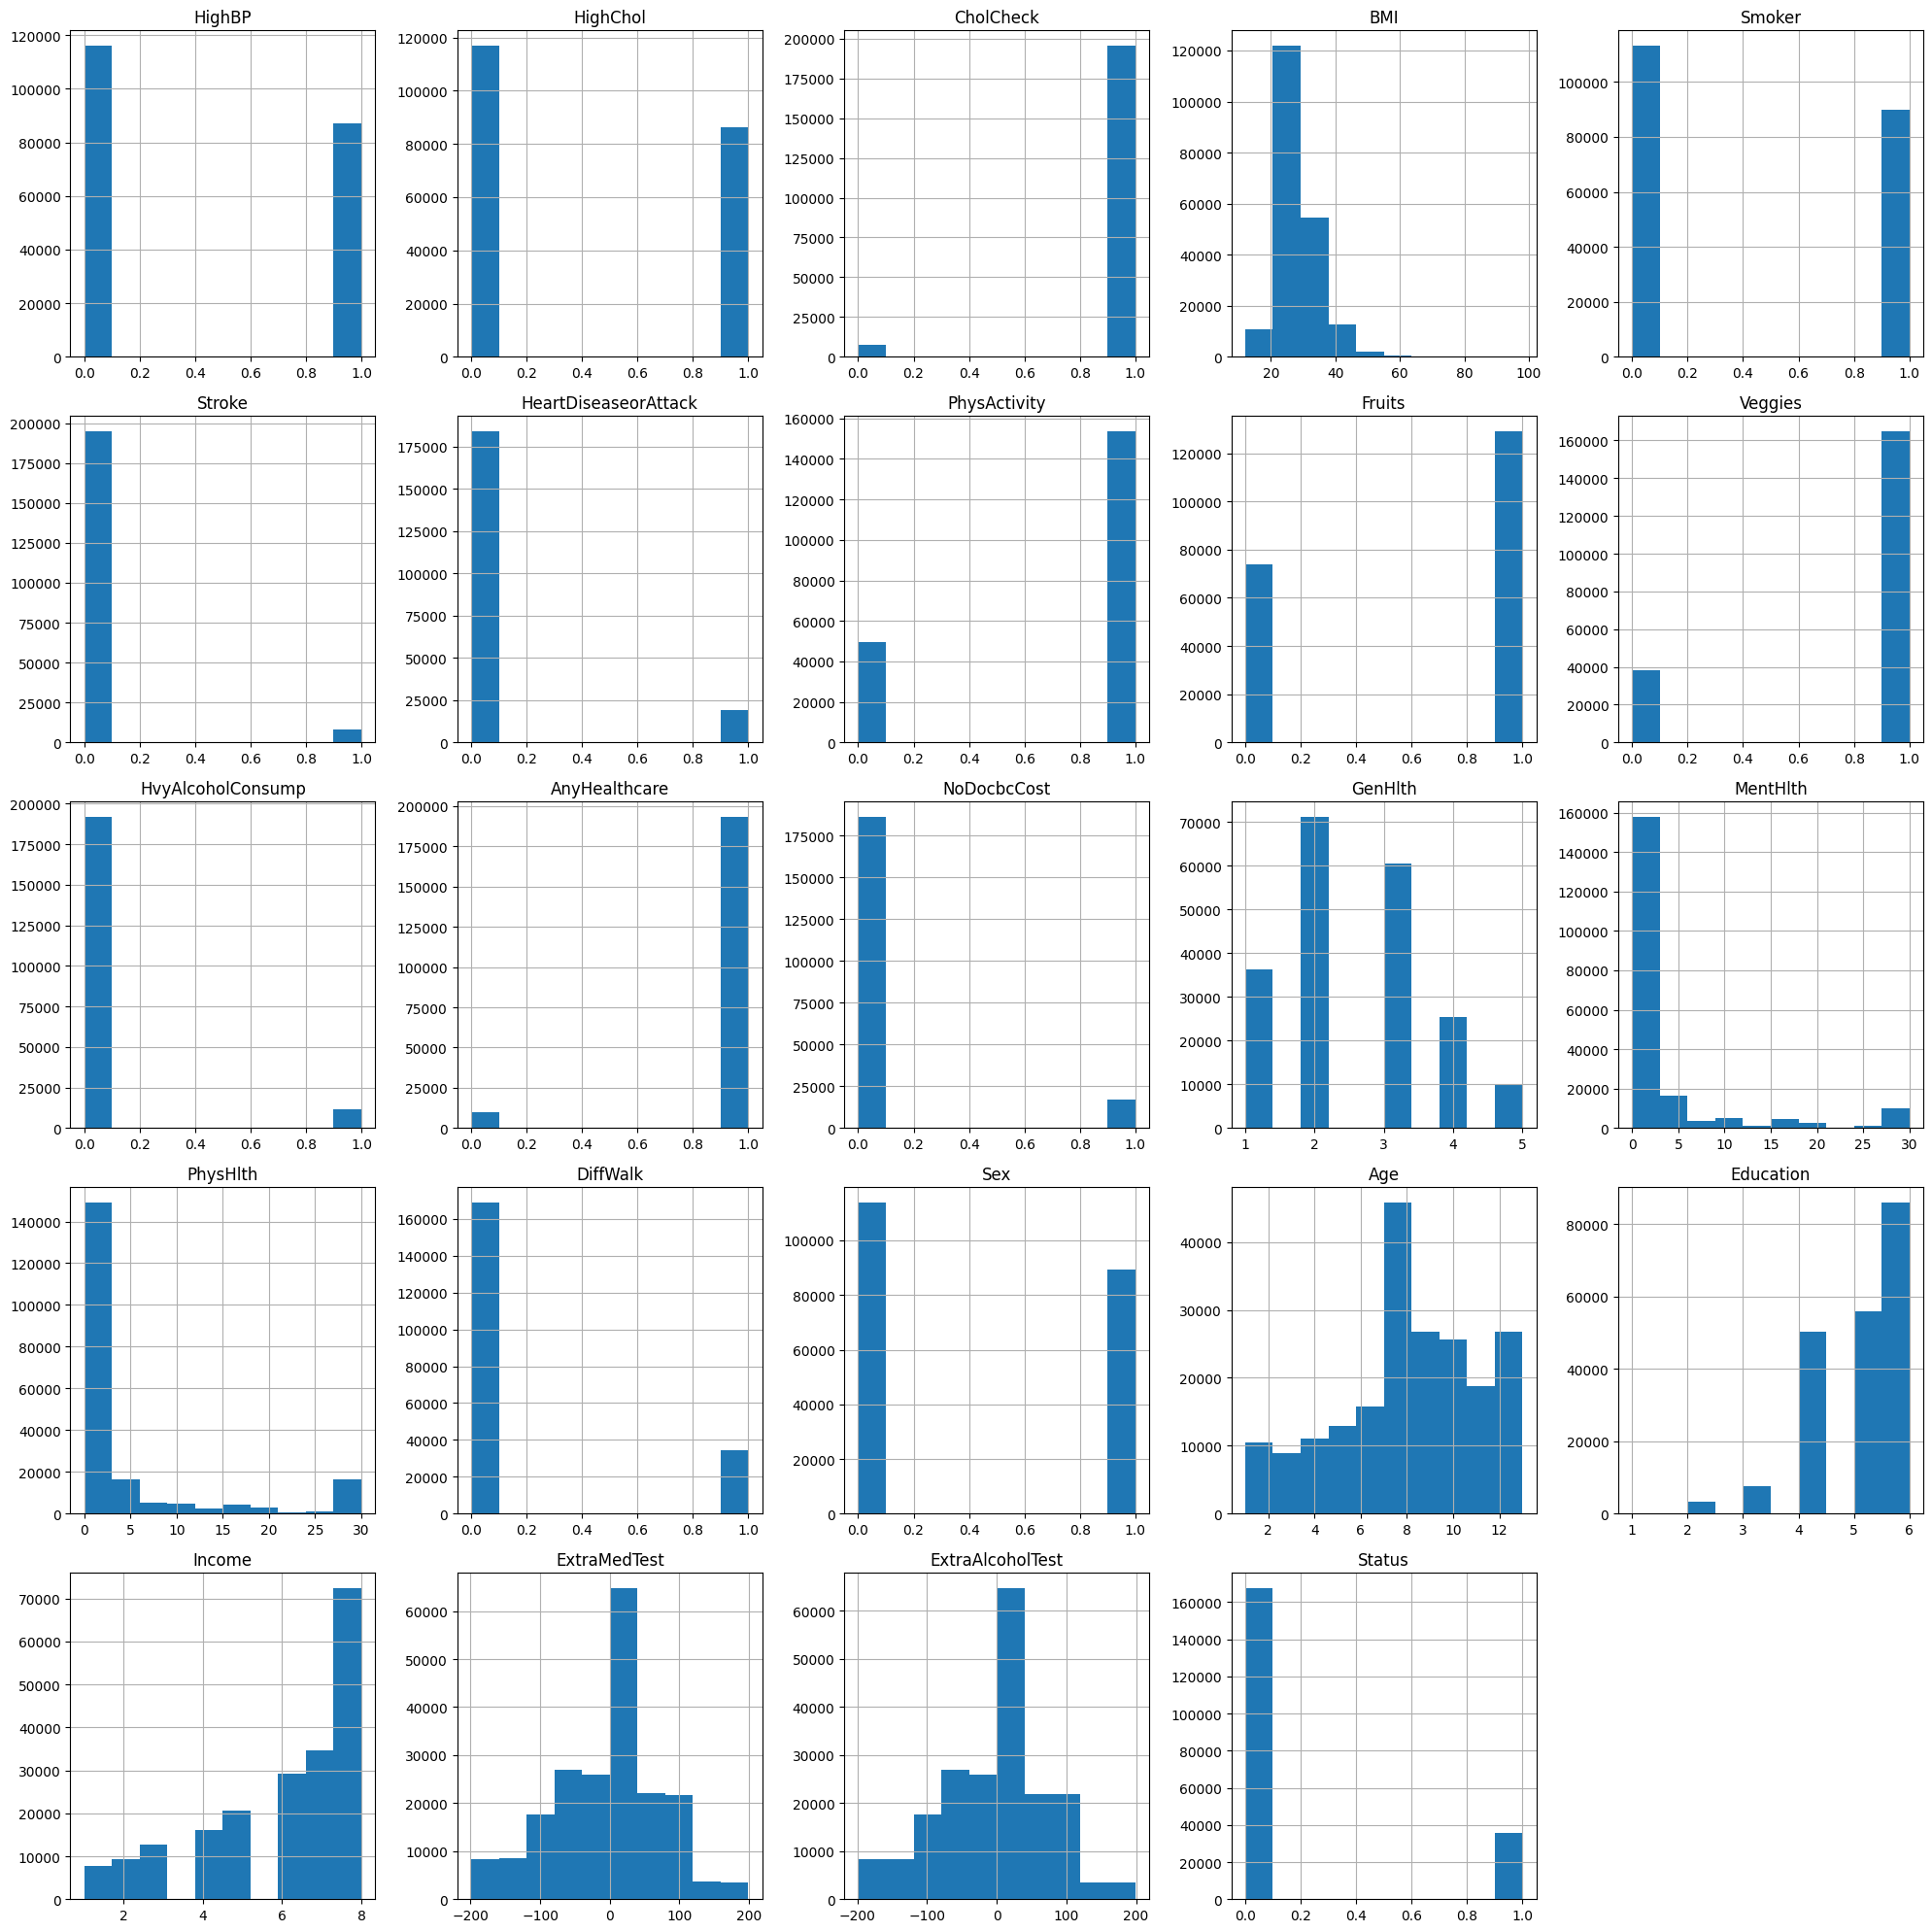

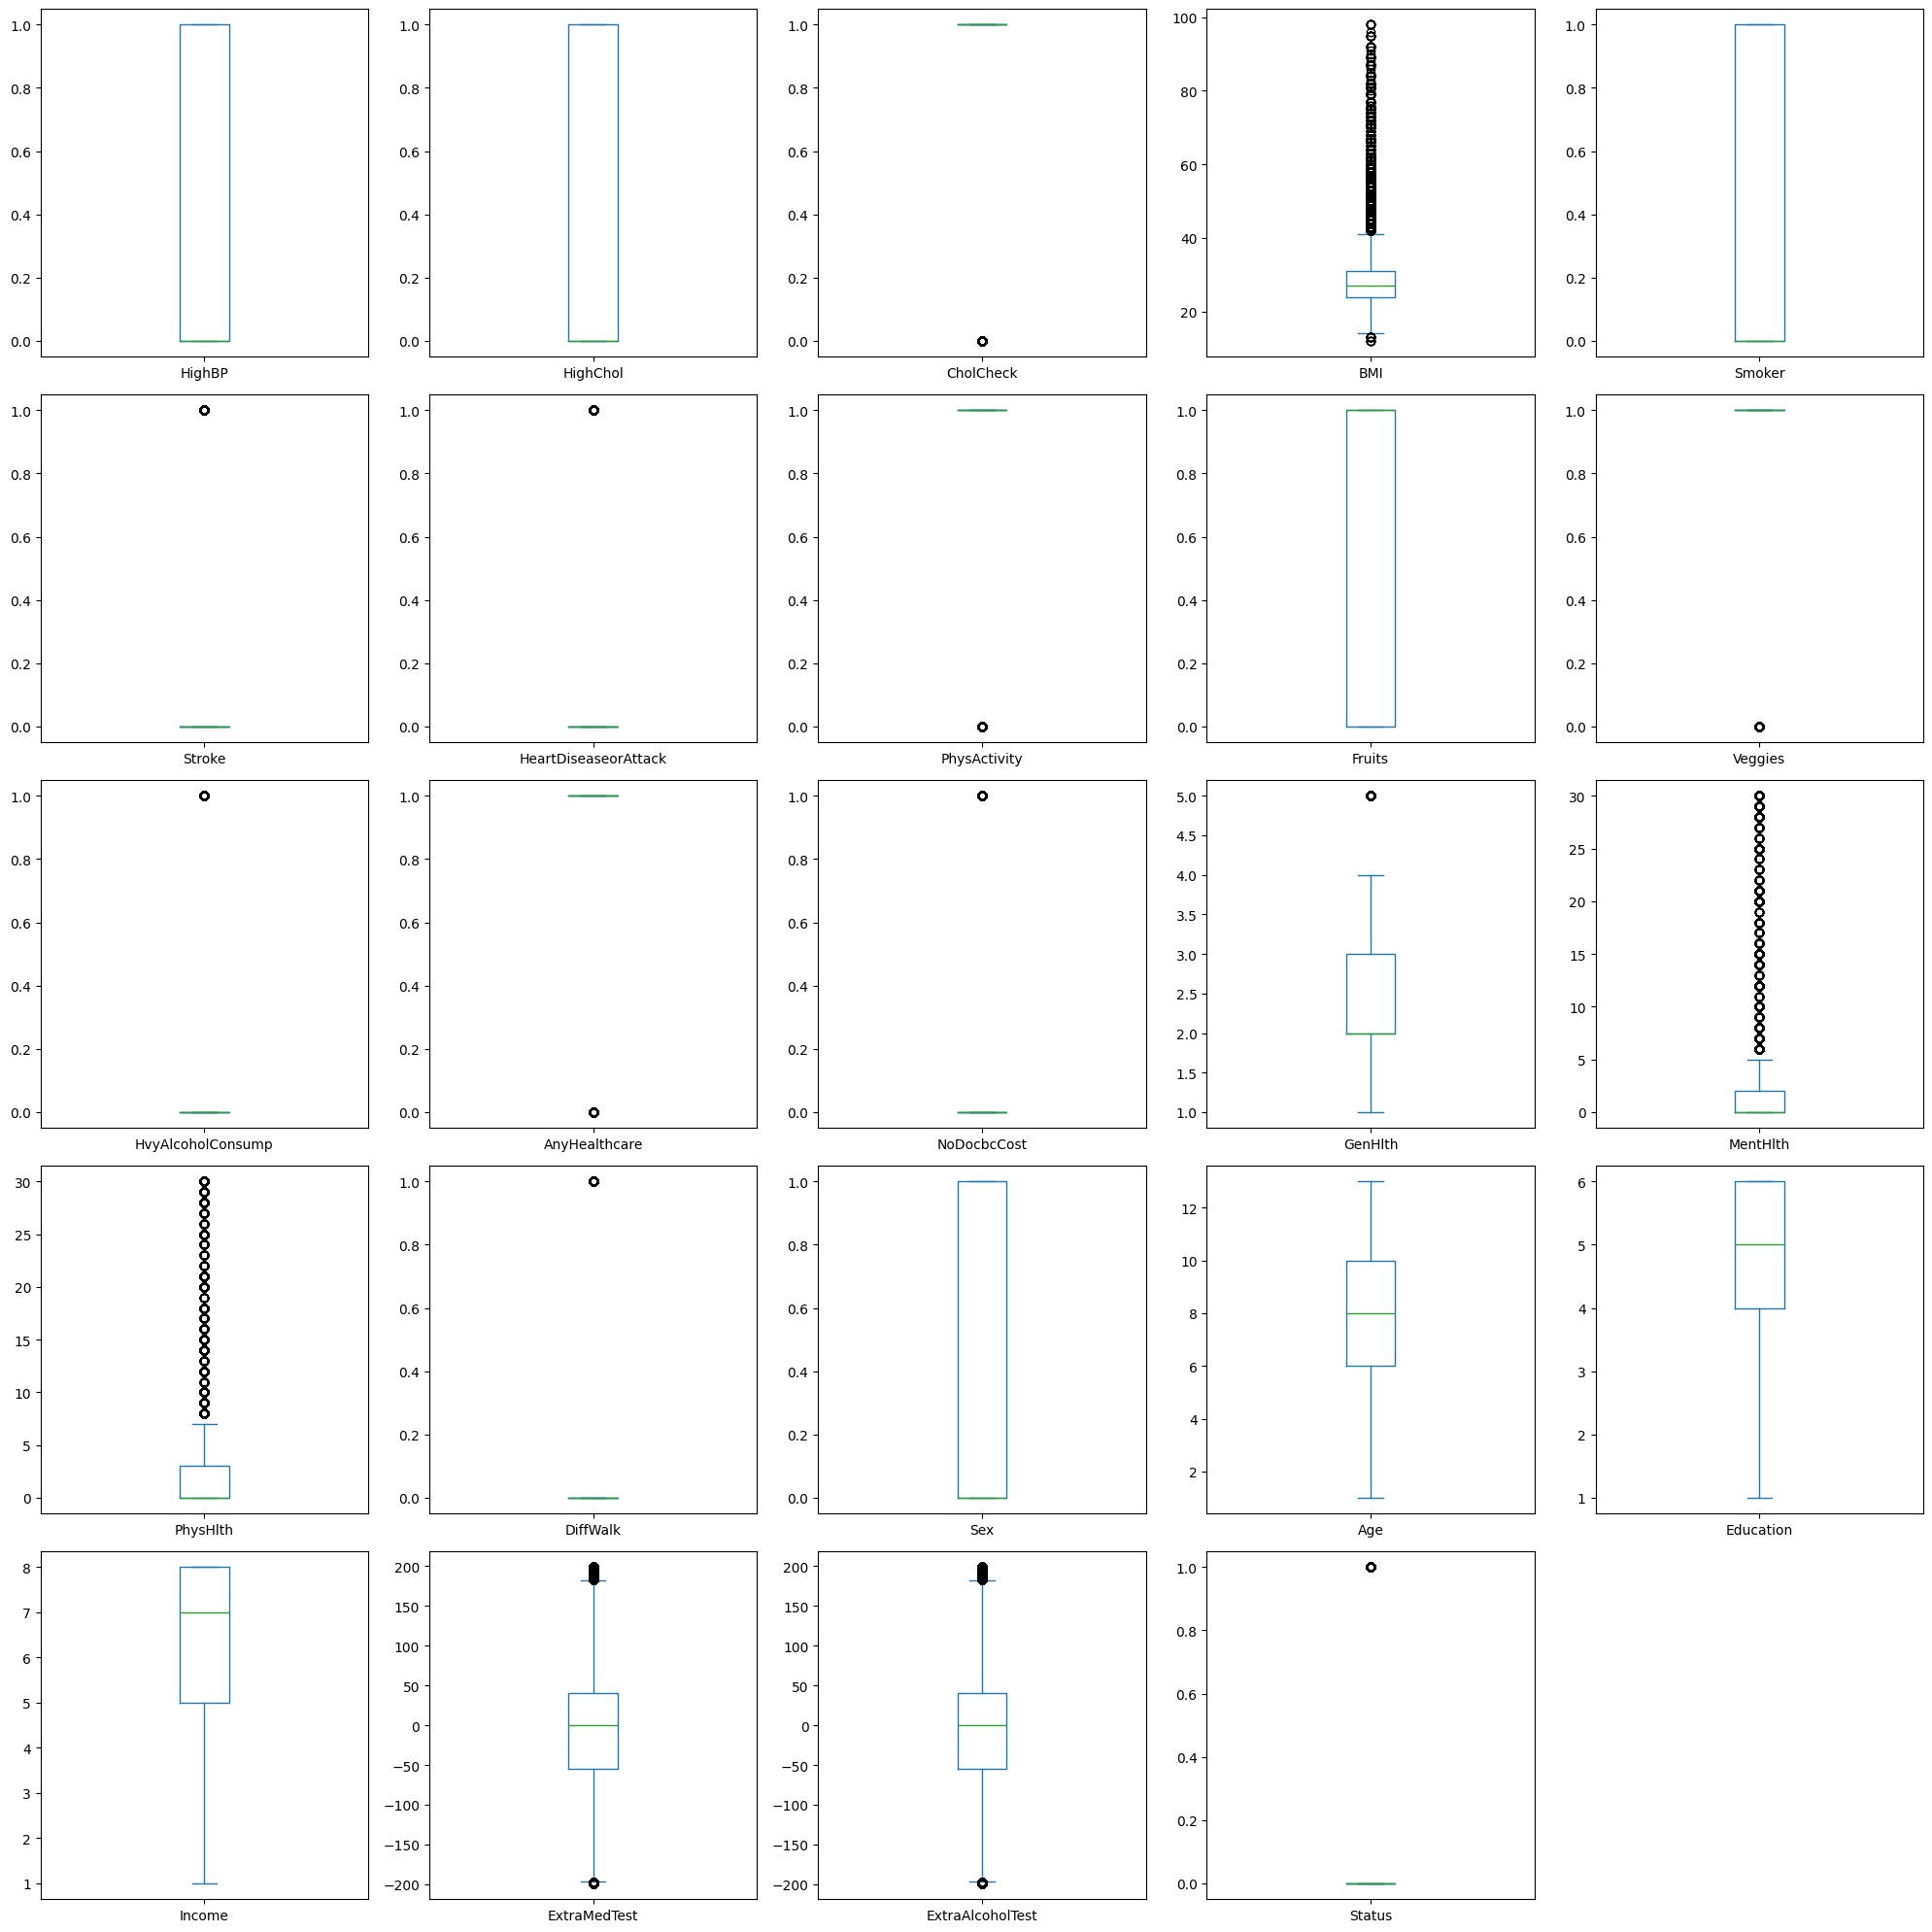

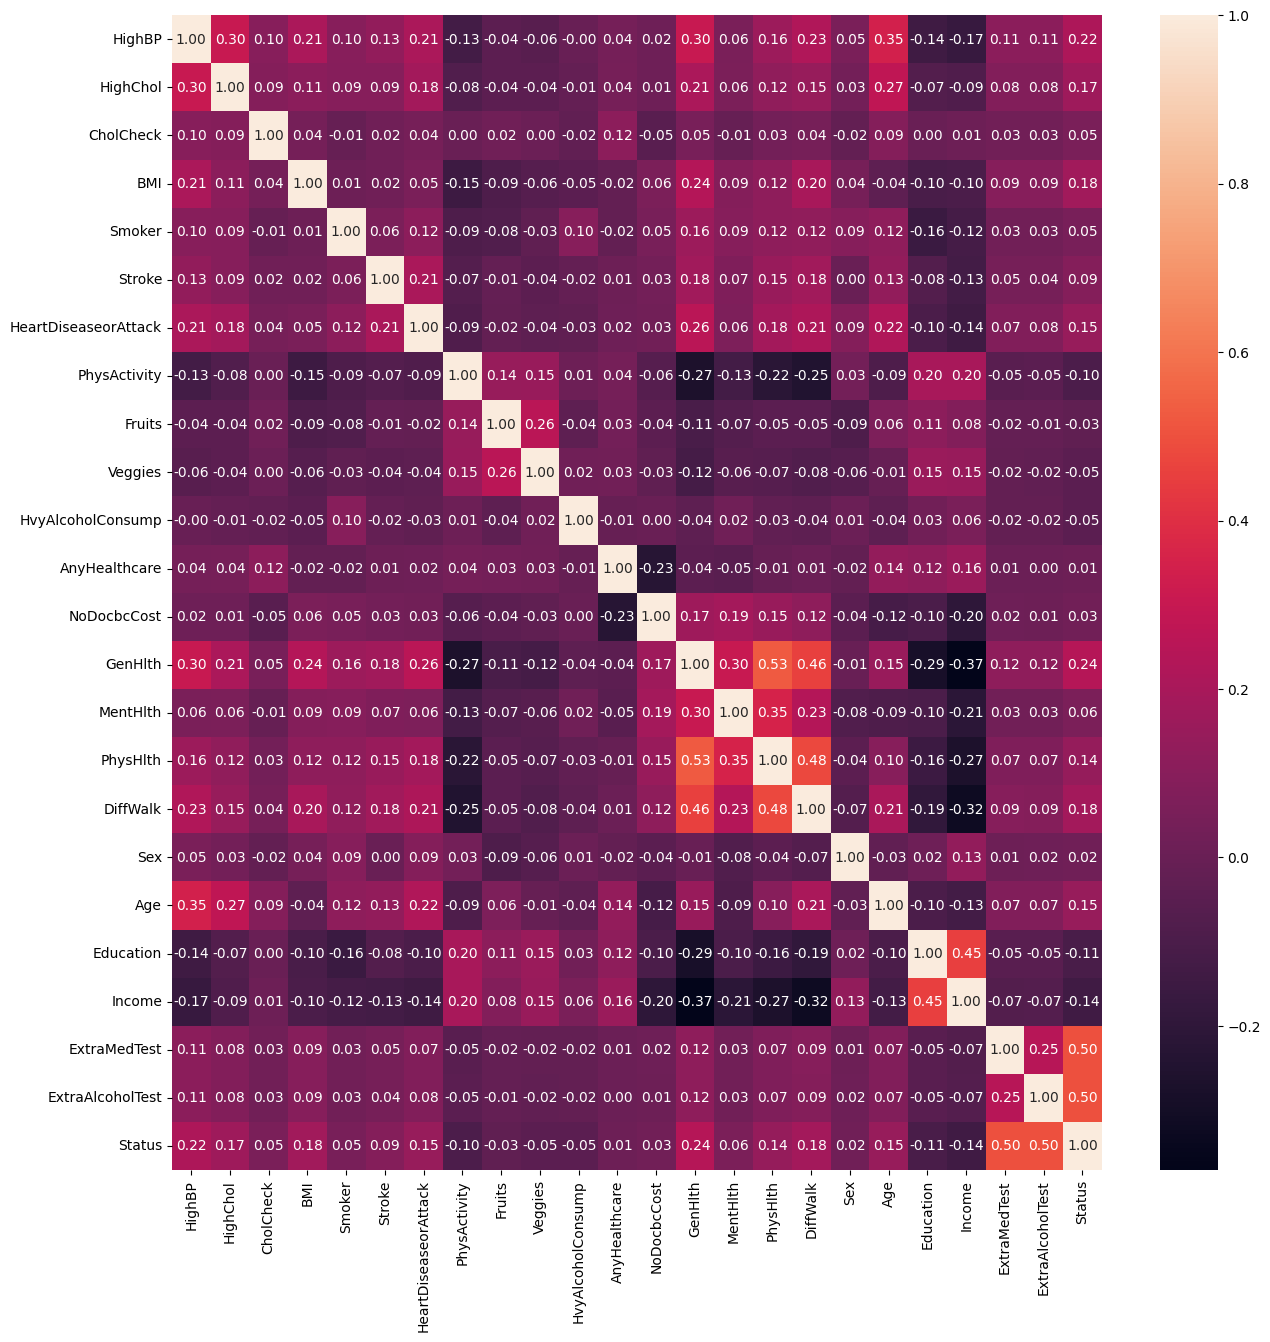

In [94]:
# Plot histograms for each column
df_train.hist(figsize=(20,20))
plt.tight_layout()
plt.show()

# Plot boxplots for each column
df_train.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(20,20))
plt.tight_layout()
plt.show()

# Plot correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(), annot=True, fmt=".2f")
plt.show()

After look through the above details, we can see:
- There is no null data point
- All the features are in the right scale, except "ExtraMedTest" and "ExtraAlcoholTest". It should be in range -100 -> 100 but it actually in range -199 -> 199

In [95]:
# Scale 'ExtraMedTest' and 'ExtraAlcoholTest' to range -100 -> 100 for correctness of the description, although it is not necessary since we will apply min/max scaling later.
df_train['ExtraMedTest'] = df_train['ExtraMedTest'] / 2
df_train['ExtraAlcoholTest'] = df_train['ExtraAlcoholTest'] / 2


In [96]:

# Apply MinMaxScaler
scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_train)

# Convert numpy array back to DataFrame
df_train = pd.DataFrame(df_train_scaled, columns=df_train.columns, index=df_train.index)

In [97]:
# n = 1  # number of iterations

# for i in range(n):
#     Q1 = df_train.quantile(0.25)
#     Q3 = df_train.quantile(0.75)
#     IQR = Q3 - Q1

#     df_train = df_train[~((df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))).any(axis=1)]
    
#     # Plot boxplot after removing outliers

#     df_train.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False,figsize=(20,20))
#     plt.tight_layout()
#     plt.show()


In [98]:
df_train.shape

(202944, 24)

## Train Model


In [99]:
from imblearn.under_sampling import RandomUnderSampler
X = df_train.drop('Status', axis=1)
y = df_train['Status']

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.33, random_state=42)


In [100]:
# Train the model
reg = LinearRegression().fit(X_train, y_train)

# Compute accuracy on the training set
train_accuracy = reg.score(X_train, y_train)
print(f'Training Accuracy: {train_accuracy * 100}%')

# Compute accuracy on the test set
test_accuracy = reg.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100}%')


Training Accuracy: 57.31989807170266%
Test Accuracy: 57.77617376184283%
